Andrew Bettendorf
DATA 601

Proposal:

Compare the five year historical data of Nvidia, Microsoft and Apple. The data is pulled from the Yahoo Finance API. We look at the Market Capitalization of these companies and create some visualizations with time series of the stock price and their daily excess returns.

Questions:
Which company has the highest/lowest reward? Which company has the highest/lowest risk?

Which company has the best risk/reward ratio?

Which company is the best investment choice based purely off of historical data?

Sources:

https://www.geeksforgeeks.org/how-to-use-yfinance-api-with-python/

https://www.geeksforgeeks.org/how-to-format-numbers-as-currency-strings-in-python/

https://stackoverflow.com/questions/25524319/plotting-three-data-sets-on-a-single-plot-using-matplotlib

In [ ]:
import pandas as pd
import yfinance as yf

# list of stock ticker symbols
stock_list = ["NVDA","MSFT","AAPL"]

# for loop that loads all of the individual stock historical data
# and their market capitalization
for stock in stock_list:
# NVIDIA
    if stock is stock_list[0]:
        nvda = yf.Ticker(stock)
        nvda_mc = int(nvda.info["marketCap"])
        nvda_data = nvda.history(period="5y")
        df_nvda = pd.DataFrame(nvda_data)
# MICROSOFT
    elif stock is stock_list[1]:
        msft = yf.Ticker(stock)
        msft_mc = int(msft.info["marketCap"])
        msft_data = msft.history(period="5y")
        df_msft = pd.DataFrame(msft_data)
# APPLE
    elif stock is stock_list[2]:
        apple = yf.Ticker(stock)
        apple_mc = int(apple.info["marketCap"])
        apple_data = apple.history(period="5y")
        df_apple = pd.DataFrame(apple_data)
    else:
        continue

In [ ]:
# function that will change number to currency format
def currency(amount):
    return "${:,.2f}".format(amount)

# call currency function and assign currency string to
# a python object
nvda_mc_c = currency(nvda_mc)
msft_mc_c = currency(msft_mc)
apple_mc_c = currency(apple_mc)

# print the market capitalization of each company
print("NVIDIA MARKET CAP:", nvda_mc_c,
      "\n\nMICROSOFT MARKET CAP:", msft_mc_c,
      "\n\nAPPLE MARKET CAP:", apple_mc_c)


NVIDIA MARKET CAP: $3,482,769,162,240.00 

MICROSOFT MARKET CAP: $3,085,475,250,176.00 

APPLE MARKET CAP: $3,401,054,945,280.00


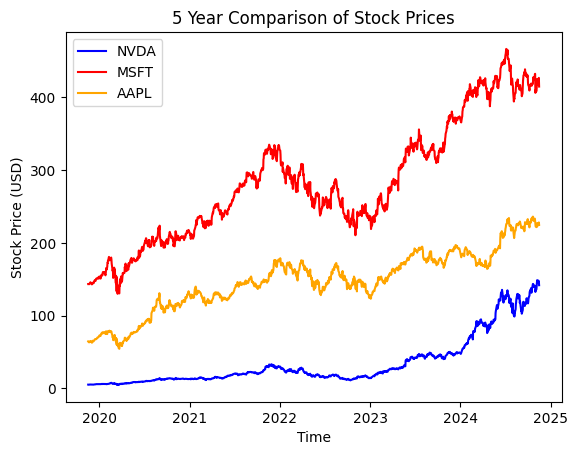

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create a graph of a 5 year comparison of each stock.
plt.plot(df_nvda['Close'], color = "blue")
plt.plot(df_msft['Close'], color = "red")
plt.plot(df_apple['Close'], color = "orange")

plt.ylabel("Stock Price (USD)")
plt.xlabel("Time")
plt.legend(stock_list)
plt.title("5 Year Comparison of Stock Prices")
plt.show()

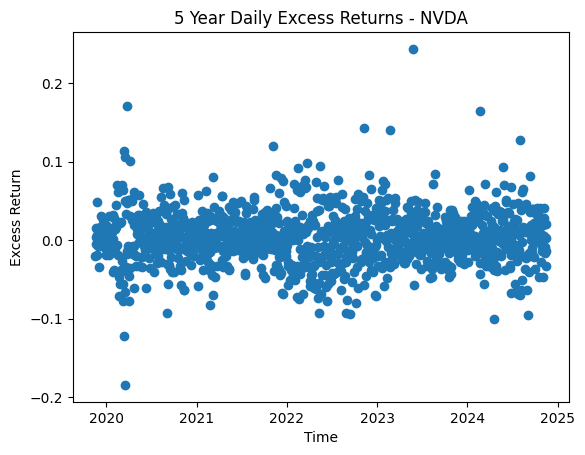

Average Daily Return of NVDA: 0.3190%
Standard Deviation of NVDA Returns: 0.03385



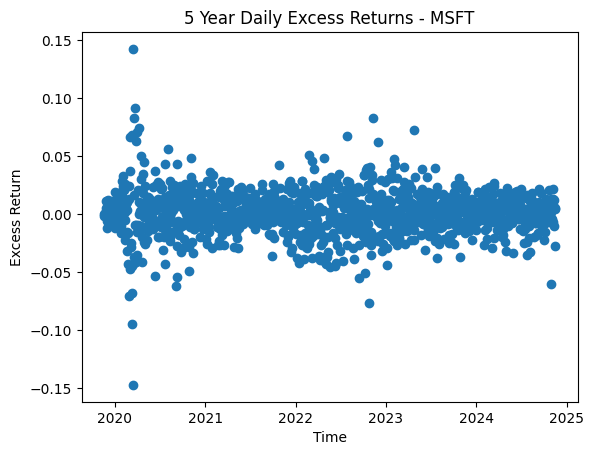

Average Daily Return of MSFT: 0.1028%
Standard Deviation of MSFT Returns: 0.01916



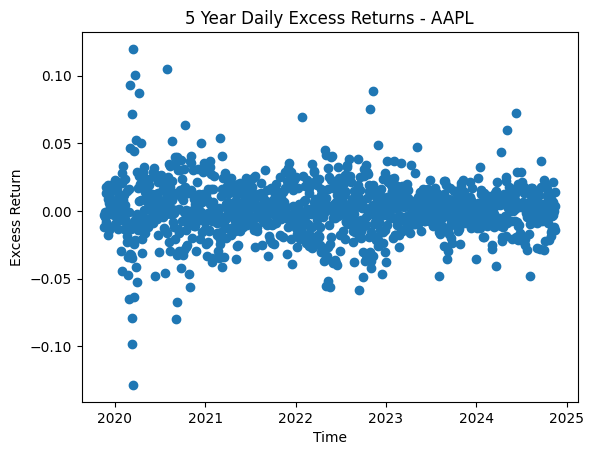

Average Daily Return of AAPL: 0.1191%
Standard Deviation of AAPL Returns: 0.01998


In [ ]:
# NVIDIA
# find the average daily returns of Nvidia and create a scatter plot
nvda_returns = df_nvda["Close"].pct_change().dropna()
nvda_x = df_nvda.index
nvda_x = nvda_x[1:]

# plotting the NVDA graph
plt.scatter(x = nvda_x, y = nvda_returns)
plt.ylabel("Excess Return")
plt.xlabel("Time")
plt.title("5 Year Daily Excess Returns - NVDA")

plt.show()

# print the average daily return and standard deviation
print("Average Daily Return of NVDA: {:.4%}".format(nvda_returns.mean()))
print("Standard Deviation of NVDA Returns: {:.4}".format(nvda_returns.std()))
print("")

# MICROSOFT
# find the average daily returns of Microsoft and create a scatter plot
msft_returns = df_msft["Close"].pct_change().dropna()
msft_x = df_msft.index
msft_x = msft_x[1:]

# plotting the MSFT graph
plt.scatter(x = msft_x, y = msft_returns)
plt.ylabel("Excess Return")
plt.xlabel("Time")
plt.title("5 Year Daily Excess Returns - MSFT")

plt.show()

# print the average daily return and standard deviation
print("Average Daily Return of MSFT: {:.4%}".format(msft_returns.mean()))
print("Standard Deviation of MSFT Returns: {:.4}".format(msft_returns.std()))
print("")

# APPLE
# find the average daily returns of Apple and create a scatter plot
apple_returns = df_apple["Close"].pct_change().dropna()
apple_x = df_apple.index
apple_x = apple_x[1:]

# plotting the AAPL graph
plt.scatter(x = apple_x, y = apple_returns)
plt.ylabel("Excess Return")
plt.xlabel("Time")
plt.title("5 Year Daily Excess Returns - AAPL")

plt.show()

# print the average daily return and standard deviation
print("Average Daily Return of AAPL: {:.4%}".format(apple_returns.mean()))
print("Standard Deviation of AAPL Returns: {:.4}".format(apple_returns.std()))


All three of the graphs above show massive gains and losses in early 2020. It is important to note that this was when the COVID pandemic hit and there was a sharp sell off in the stock market followed by quick gains. After the pandemic, the market seems to return to some sort of normalcy.

Nvidia is the stock with the best average daily return. Meaning it has the highest reward. Microsoft is the stock with the lowest standard deviation. Meaning it has the lowest risk.

In [ ]:
# function that will show the stock with the best risk/reward ratio
def risk_reward(risk, reward):
    return risk/reward

# call the function and assign it to python objects
nvda_ratio = risk_reward(nvda_returns.std(), nvda_returns.mean())
msft_ratio = risk_reward(msft_returns.std(), msft_returns.mean())
apple_ratio = risk_reward(apple_returns.std(), msft_returns.mean())

# print the risk/reward ratio of each company
print("Nvidia's risk to reward ratio is: {:.5}".format(nvda_ratio))
print("")
print("Microsoft's risk to reward ratio is: {:.5}".format(msft_ratio))
print("")
print("Apple's risk to reward ratio is: {:.5}".format(apple_ratio))

Nvidia's risk to reward ratio is: 10.614

Microsoft's risk to reward ratio is: 18.633

Apple's risk to reward ratio is: 19.429


Nvidia has the best risk to reward ratio. Their stock has a higher standard deviation than Microsoft and Apple, but the reward is also significantly higher. This is due to the recent AI boom, which we can see from the high excess returns in 2023 and 2024. Nvidia's risk to reward ratio makes this company the best investment choice.